# Exercise 4.10 - Part 1

## Contents:

1. Importing libraries
2. Import Data set
3. Data Security
4. Deriving Regional Segmentation
5. Creating exclusion flag for low-activity customers
6. Customer Profiling & Profile Distribution Visualizations
7. Profile Aggregation
8. Visualizations of profiles by Region & Department
9. Export Data set



## 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import Data set

Task 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Create path to import 'orders_products_customers.pkl' dataset
path=r'C:\Users\swati\Instacart Basket Analysis'

In [3]:
# Import complete dataframe
df_all_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))

In [4]:
# Import department dict
df_dept_dict = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

## 3. Data Security

Task 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# Check for the list of columns
df_all_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income'],
      dtype='object')

In [6]:
df_all_merged.shape

(32404859, 31)

##### There is no column present in the dataframe which contains any personally identifiable information(PII)

## 4. Deriving Regional Segmentation

Task 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

3a.Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [7]:
# Create for-loop to check 'Northeast','Midwest','West' and 'South' regions of U.S.

region = []
for value in df_all_merged['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value =='New Jersey'):
        region.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        region.append('Midwest')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        region.append('West')
    else:
        region.append('South')

In [8]:
# Create 'region' column based on 'state'column

df_all_merged['region'] = region

In [9]:
# Check the frequency of 'region'
df_all_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# Check for missing value in newly derived column
df_all_merged[df_all_merged['region'].isnull()]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,region


Task 3b. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
# Data check after creating 'region'column using function 'crosstab'
region_spending = pd.crosstab(df_all_merged['region'], df_all_merged['spending_flag'], dropna = False)

In [12]:
# Copy created table to clipboard
region_spending.to_clipboard()

In [13]:
# View the output
region_spending

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


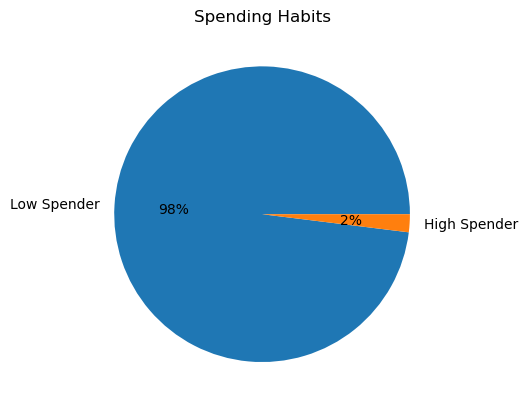

In [14]:
spending_pie = df_all_merged['spending_flag'].value_counts().plot.pie(title ='Spending Habits', label = '', autopct=('%1.f%%'))

In [15]:
# exporting pie chart
spending_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Spending_habit_pie.png'))

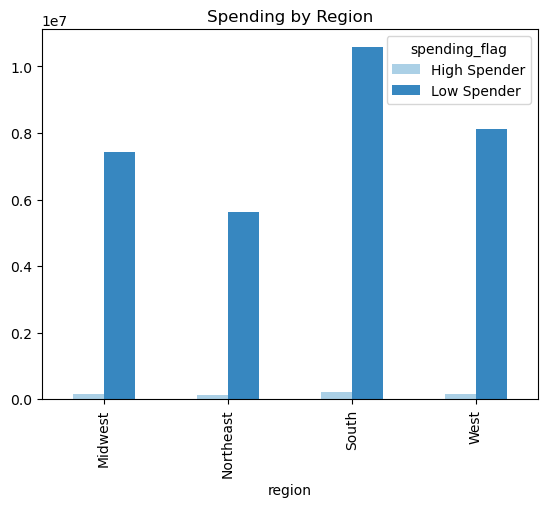

In [16]:
region_bar = region_spending.plot.bar(color = sns.color_palette('Blues', 2),title = 'Spending by Region')

In [17]:
# Export bar graph
region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

## 5. Creating exclusion flag for low-activity customers

Task 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [18]:
# Create 'low-activity' flag
df_all_merged.loc[df_all_merged['max_order'] < 5, 'activity_flag'] = 'low activity'

In [19]:
# Create 'High-activity' flag
df_all_merged.loc[df_all_merged['max_order'] >=5, 'activity_flag'] = 'High activity'

In [20]:
# Check frequency of activity flag
df_all_merged['activity_flag'].value_counts(dropna = False)

High activity    30964564
low activity      1440295
Name: activity_flag, dtype: int64

In [21]:
# creating the subset of high acitivity customers
df_high_active_customers = df_all_merged.loc[df_all_merged['activity_flag'] == 'High activity']

In [22]:
#Check the size of subset
df_high_active_customers.shape

(30964564, 33)

In [23]:
#Exporting sample dataset
df_high_active_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_active_customers_sample.pkl'))

## 6. Customer Profiling & Profile Distribution Visualizations

Task 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.                                      
(Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Task 6: Create an appropriate visualization to show the distribution of profiles.

In [24]:
# Check descriptive statistics on age, income,department_id , and number of dependents. 
df_all_merged[['age','income','department_id','number_of_dependants']].describe()

,age,income,department_id,number_of_dependants
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,4.946527e+01,9.943773e+04,9.919792e+00,1.501896e+00
std,1.848558e+01,4.305727e+04,6.281485e+00,1.118865e+00
min,1.800000e+01,2.590300e+04,1.000000e+00,0.000000e+00
25%,3.300000e+01,6.700400e+04,4.000000e+00,1.000000e+00
50%,4.900000e+01,9.661800e+04,9.000000e+00,2.000000e+00
75%,6.500000e+01,1.279120e+05,1.600000e+01,3.000000e+00
max,8.100000e+01,5.939010e+05,2.100000e+01,3.000000e+00


In [25]:
# Create age flags
df_all_merged.loc[(df_all_merged['age'] <= 40), 'age_profile'] = '18-40'
df_all_merged.loc[(df_all_merged['age'] > 40) & (df_all_merged['age'] <= 65), 'age_profile'] = '41-65'
df_all_merged.loc[(df_all_merged['age'] > 65), 'age_profile'] = 'Above 65'
df_all_merged['age_profile'].value_counts(dropna = False)

41-65       12646712
18-40       11670046
Above 65     8088101
Name: age_profile, dtype: int64

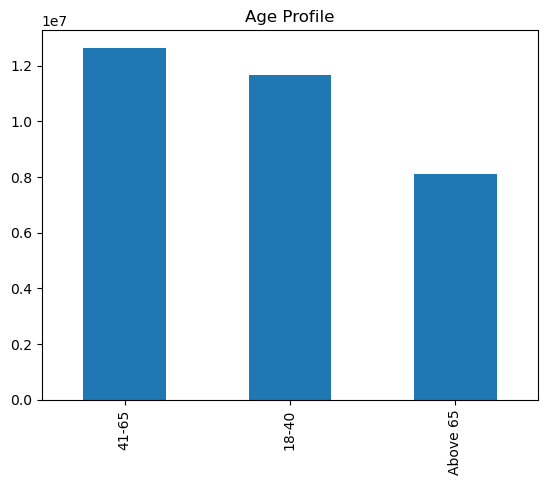

In [26]:
#Create bar chart of 'age profile'
age_profile_bar = df_all_merged['age_profile'].value_counts().plot.bar(title ='Age Profile')

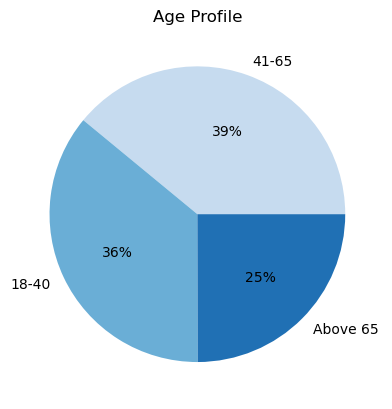

In [27]:
# Create pie chart 
age_profile_pie = df_all_merged['age_profile'].value_counts().plot.pie(title ='Age Profile', label = '', colors = sns.color_palette('Blues', 3), autopct=('%1.f%%'))

In [28]:
# Export bar chart
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_Profile_bar.png'))

In [29]:
# Export pie chart
age_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_Profile_pie.png'))

In [30]:
# Create 'income-profile' flag
df_all_merged.loc[(df_all_merged['income'] <= 50000), 'income_profile'] = '<=50k'
df_all_merged.loc[(df_all_merged['income'] > 50000) & (df_all_merged['income'] <= 150000), 'income_profile'] = '50k - 150k'
df_all_merged.loc[(df_all_merged['income'] > 150000), 'income_profile'] = '150k+'
df_all_merged['income_profile'].value_counts(dropna = False)

50k - 150k    24759936
150k+          4050840
<=50k          3594083
Name: income_profile, dtype: int64

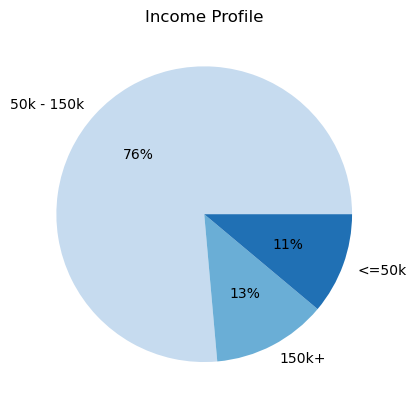

In [31]:
# Create pie chart 
income_profile_pie = df_all_merged['income_profile'].value_counts().plot.pie(title ='Income Profile', label = '', colors = sns.color_palette('Blues', 3), autopct=('%1.f%%'))

#### Majority customers of Instacart earn between 50k to 150k

In [32]:
# Export pie chart
income_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_Profile_pie.png'))

In [33]:
# Create profile based on number of dependants
df_all_merged.loc[(df_all_merged['number_of_dependants'] == 0), 'family_profile'] = 'Single Adult'
df_all_merged.loc[(df_all_merged['number_of_dependants'] != 0), 'family_profile'] = 'Family'
df_all_merged['family_profile'].value_counts(dropna = False)

Family          24307356
Single Adult     8097503
Name: family_profile, dtype: int64

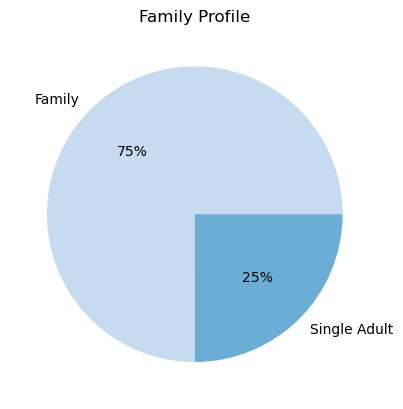

In [34]:
# Create Famiy profile chart 
family_profile_pie = df_all_merged['family_profile'].value_counts().plot.pie(title ='Family Profile', label = '', colors = sns.color_palette('Blues', 3), autopct=('%1.f%%'))

In [35]:
# Export pie chart
family_profile_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_Profile_pie.png'))

In [36]:
# Create profile of orders using Days of week column
df_all_merged['orders_day_of_week'].value_counts(dropna = False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

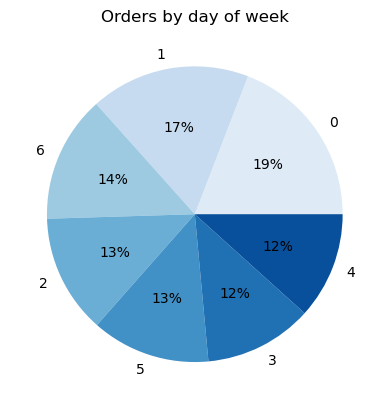

In [37]:
# Create pie chart for Day of week profile
dow_profile_pie = df_all_merged['orders_day_of_week'].value_counts().plot.pie(title ='Orders by day of week', label = '', colors = sns.color_palette('Blues', 7), autopct=('%1.f%%'))

In [38]:
# Export pie chart
dow_profile_pie .figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders_by_dow_pie.png'))

## 7. Profile Aggregation

Task 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
# Descriptive statistics for age profile
age_agg = df_all_merged.groupby(['age_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'],'prices' : ['min', 'max', 'mean', 'sum']})
age_agg

days_since_prior_order                  prices           \
                               min   max       mean    min      max   
age_profile                                                           
18-40                          0.0  30.0  11.109790    1.0  99999.0   
41-65                          0.0  30.0  11.113621    1.0  99999.0   
Above 65                       0.0  30.0  11.080922    1.0  99999.0   

                                     
                  mean          sum  
age_profile                          
18-40        12.085039  141032956.7  
41-65        11.974159  151433742.2  
Above 65     11.838480   95750823.7

In [40]:
# Descriptive statistics for income profile
income_agg = df_all_merged.groupby(['income_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
income_agg

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
income_profile                                                           
150k+                             0.0  30.0  10.941399    1.0  99999.0   
50k - 150k                        0.0  30.0  11.061343    1.0  99999.0   
<=50k                             0.0  30.0  11.587220    1.0     25.0   

                                        
                     mean          sum  
income_profile                          
150k+           32.894506  133250381.7  
50k - 150k       9.325453  230897619.2  
<=50k            6.696985   24069521.7

In [41]:
# Descriptive statistics for family profile
family_agg = df_all_merged.groupby(['family_profile']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
family_agg

days_since_prior_order                  prices           \
                                  min   max       mean    min      max   
family_profile                                                           
Family                            0.0  30.0  11.111834    1.0  99999.0   
Single Adult                      0.0  30.0  11.080805    1.0  99999.0   

                                        
                     mean          sum  
family_profile                          
Family          11.930584  290000944.5  
Single Adult    12.129243   98216578.1

In [42]:
# Descriptive statistics for day of the week orders profile
orders_dow_agg = df_all_merged.groupby(['orders_day_of_week']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
orders_dow_agg

days_since_prior_order                  prices           \
                                      min   max       mean    min      max   
orders_day_of_week                                                           
0                                     0.0  30.0  11.614875    1.0  99999.0   
1                                     0.0  30.0  11.298687    1.0  99999.0   
2                                     0.0  30.0  11.282383    1.0  99999.0   
3                                     0.0  30.0  10.874934    1.0  99999.0   
4                                     0.0  30.0  10.547649    1.0  99999.0   
5                                     0.0  30.0  10.452144    1.0  99999.0   
6                                     0.0  30.0  11.269111    1.0  99999.0   

                                           
                         mean         sum  
orders_day_of_week                         
0                   11.166988  69282023.0  
1                   12.181343  68949204.4  
2                   12.356269  52067217.5  
3                   12.235072  46989210.9  
4                   12.169939  46048640.6  
5                   12.884135  54187979.1  
6                   11.273960  50693247.1

In [43]:
# Descriptive statistics for day of the week orders profile
order_hod_agg = df_all_merged.groupby(['order_hour_of_day']).agg({'days_since_prior_order' : ['min', 'max', 'mean'], 'prices' : ['min', 'max', 'mean', 'sum']})
order_hod_agg

days_since_prior_order                  prices           \
                                     min   max       mean    min      max   
order_hour_of_day                                                           
0                                    0.0  30.0  12.015821    1.0  99999.0   
1                                    0.0  30.0  12.356100    1.0  14900.0   
2                                    0.0  30.0  12.133394    1.0  99999.0   
3                                    0.0  30.0  12.404158    1.0  99999.0   
4                                    0.0  30.0  12.741053    1.0  99999.0   
5                                    0.0  30.0  11.750200    1.0  99999.0   
6                                    0.0  30.0  10.706380    1.0  99999.0   
7                                    0.0  30.0  10.533011    1.0  99999.0   
8                                    0.0  30.0  10.546751    1.0  99999.0   
9                                    0.0  30.0  10.673611    1.0  99999.0   
10                                   0.0  30.0  10.976324    1.0  99999.0   
11                                   0.0  30.0  11.162041    1.0  99999.0   
12                                   0.0  30.0  11.257181    1.0  99999.0   
13                                   0.0  30.0  11.271754    1.0  99999.0   
14                                   0.0  30.0  11.217488    1.0  99999.0   
15                                   0.0  30.0  11.257823    1.0  99999.0   
16                                   0.0  30.0  11.354328    1.0  99999.0   
17                                   0.0  30.0  11.475205    1.0  99999.0   
18                                   0.0  30.0  11.412620    1.0  99999.0   
19                                   0.0  30.0  11.208248    1.0  99999.0   
20                                   0.0  30.0  10.691257    1.0  99999.0   
21                                   0.0  30.0  10.490180    1.0  99999.0   
22                                   0.0  30.0  10.535959    1.0  99999.0   
23                                   0.0  30.0  10.829761    1.0  99999.0   

                                          
                        mean         sum  
order_hour_of_day                         
0                  10.427095   2281125.1  
1                   9.993842   1156287.5  
2                  14.699103   1019750.3  
3                  13.262809    680130.1  
4                  12.234026    651364.0  
5                  12.641260   1111937.9  
6                  11.779887   3421974.7  
7                  12.301535  10961331.9  
8                  12.477302  21437476.7  
9                  11.747220  28830061.7  
10                 11.901193  32868237.5  
11                 12.158937  33268554.8  
12                 11.945792  31280439.7  
13                 11.477570  30541285.8  
14                 11.739501  31569115.4  
15                 12.170932  32400773.8  
16                 12.540657  31793097.5  
17                 12.807097  26736786.6  
18                 11.829452  19358922.1  
19                 12.533304  15770718.8  
20                 11.749487  11469332.3  
21                 11.236173   8939914.7  
22                 10.037468   6366013.0  
23                 10.695301   4302890.7

## 8. Visualizations of profiles by Region & Department

Task 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [44]:
#crosstab between age profile and region
region_age_profile = pd.crosstab(df_all_merged['region'], df_all_merged['age_profile'], dropna = False)

In [45]:
region_age_profile.to_clipboard()

In [46]:
region_age_profile

age_profile,18-40,41-65,Above 65
region,,,
Midwest,2714478,3001210,1881637
Northeast,2045848,2217936,1458952
South,3950044,4172421,2669420
West,2959676,3255145,2078092


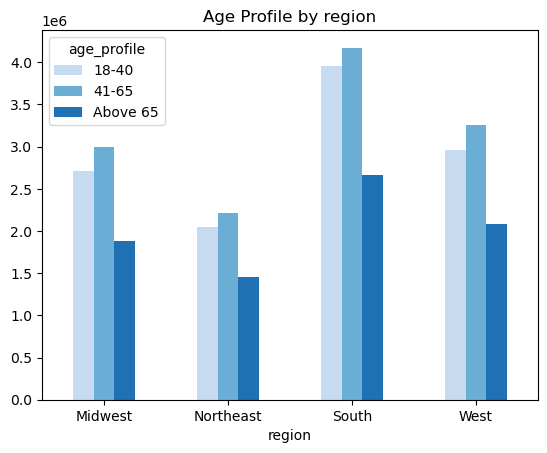

In [47]:
region_age_profile_bar = region_age_profile.plot.bar(title ='Age Profile by region',rot = 0, color = sns.color_palette('Blues', 3))

In [48]:
# Export bar chart
region_age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_profile_region_bar.png'))

In [49]:
#crosstab between income profile and region
region_income_profile = pd.crosstab(df_all_merged['region'], df_all_merged['income_profile'], dropna = False)

In [50]:
region_income_profile.to_clipboard()

In [51]:
region_income_profile

income_profile,150k+,50k - 150k,<=50k
region,,,
Midwest,955414,5803513,838398
Northeast,706738,4388742,627256
South,1342055,8230370,1219460
West,1046633,6337311,908969


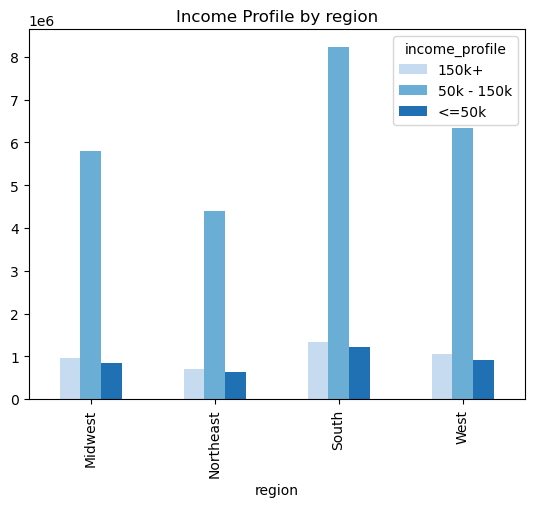

In [52]:
region_income_profile_bar = region_income_profile.plot.bar(title ='Income Profile by region', color = sns.color_palette('Blues', 3))

In [53]:
# Export bar chart
region_income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_profile_region_bar.png'))

In [54]:
# Depertment selection by age profiles
depts_age_profile = pd.crosstab(df_all_merged['department_id'], df_all_merged['age_profile'], dropna = False)

In [55]:
depts_age_profile.to_clipboard()

In [56]:
depts_age_profile

age_profile,18-40,41-65,Above 65
department_id,,,
1,801086,873340,560317
2,13218,14275,8798
3,421442,459763,291223
4,3417016,3693961,2368314
5,57243,59505,36948
6,97977,104661,66615
7,957256,1055598,675269
8,35248,37591,24877
9,312430,337785,216412


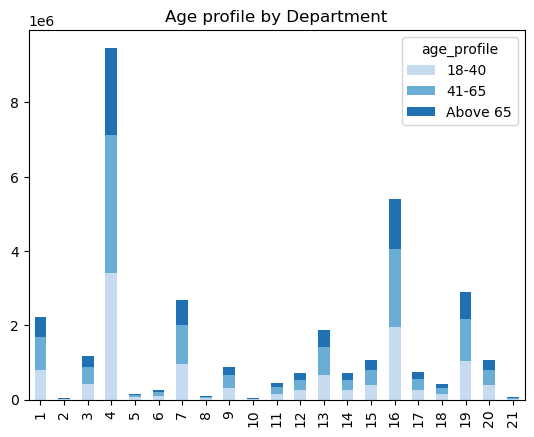

In [57]:
depts_age_profile_bar = depts_age_profile.plot(kind = 'bar', stacked = True, title = 'Age profile by Department', color = sns.color_palette('Blues', 3), xlabel = '')

In [58]:
# Export  chart
depts_age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age_profile_departmemt_bar.png'))

In [59]:
# Depertment selection by income profiles
depts_income_profile = pd.crosstab(df_all_merged['department_id'], df_all_merged['income_profile'], dropna = False)

In [60]:
depts_income_profile.to_clipboard()

In [61]:
depts_income_profile

income_profile,150k+,50k - 150k,<=50k
department_id,,,
1,288292,1712961,233490
2,4749,27359,4183
3,154040,903679,114709
4,1179115,7418074,882102
5,24953,108935,19808
6,34283,211529,23441
7,325093,1957525,405505
8,13514,74890,9312
9,111248,684738,70641


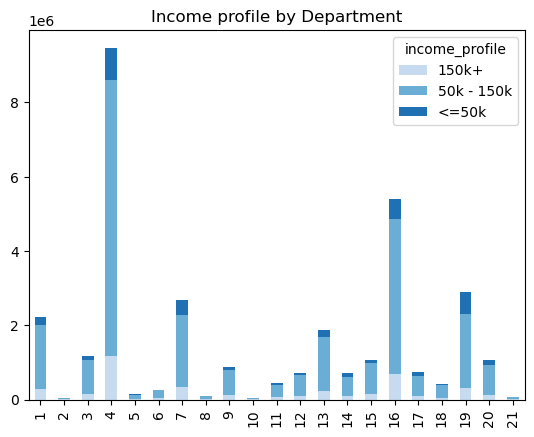

In [62]:
depts_income_profile_bar = depts_income_profile.plot(kind = 'bar', stacked = True, title = 'Income profile by Department', color = sns.color_palette('Blues', 3), xlabel = '')

In [63]:
# Export  chart
depts_income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_profile_departmemt_bar.png'))

In [64]:
#crosstab between family profile and region
region_family_profile = pd.crosstab(df_all_merged['region'], df_all_merged['family_profile'], dropna = False)

In [65]:
region_family_profile.to_clipboard()

In [66]:
region_family_profile

family_profile,Family,Single Adult
region,,
Midwest,5692125,1905200
Northeast,4304435,1418301
South,8090226,2701659
West,6220570,2072343


Text(0.5, 0, 'Region')

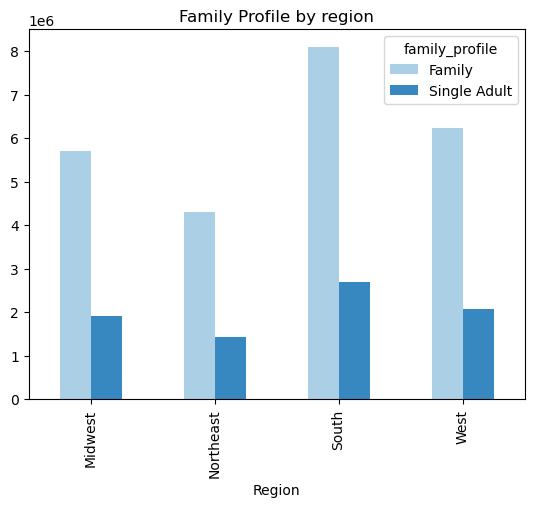

In [67]:
region_family_profile_bar = region_family_profile.plot.bar(title ='Family Profile by region', color = sns.color_palette('Blues', 2))
plt.xlabel('Region')

In [68]:
# Export  chart
region_family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_profile_region_bar.png'))

In [69]:
#crosstab between family profile and department
depts_family_profile = pd.crosstab(df_all_merged['department_id'], df_all_merged['family_profile'], dropna = False)

In [70]:
depts_family_profile.to_clipboard()

In [71]:
depts_family_profile

family_profile,Family,Single Adult
department_id,,
1,1677583,557160
2,27116,9175
3,878023,294405
4,7103846,2375445
5,114578,39118
6,201540,67713
7,2013681,674442
8,73133,24583
9,651365,215262


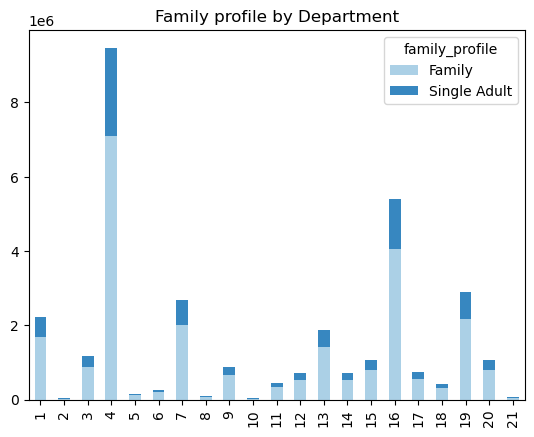

In [72]:
depts_family_profile_bar = depts_family_profile.plot(kind = 'bar', stacked = True, title = 'Family profile by Department', color = sns.color_palette('Blues', 2), xlabel = '')

In [73]:
# Export  chart
depts_family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_profile_department_bar.png'))

In [74]:
#crosstab of day of the week orders and region
region_day_of_week = pd.crosstab(df_all_merged['region'], df_all_merged['orders_day_of_week'], dropna = False)

Text(0, 0.5, 'Region')

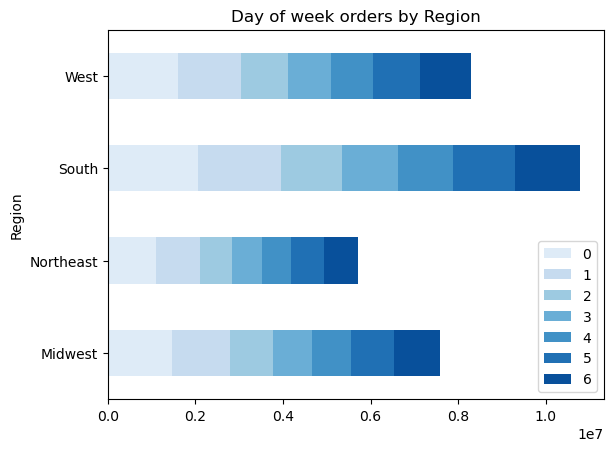

In [75]:
region_dow_bar = region_day_of_week.plot(kind = 'barh', stacked = True, title = 'Day of week orders by Region',color = sns.color_palette('Blues', 7))
plt.legend(loc='lower right')
plt.ylabel('Region')

In [76]:
# Export bar chart
region_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders_by_dow_region_bar.png'))

In [77]:
#crosstab of day of the week orders and department
dept_day_of_week = pd.crosstab(df_all_merged['department_id'], df_all_merged['orders_day_of_week'], dropna = False)

Text(0, 0.5, 'Region')

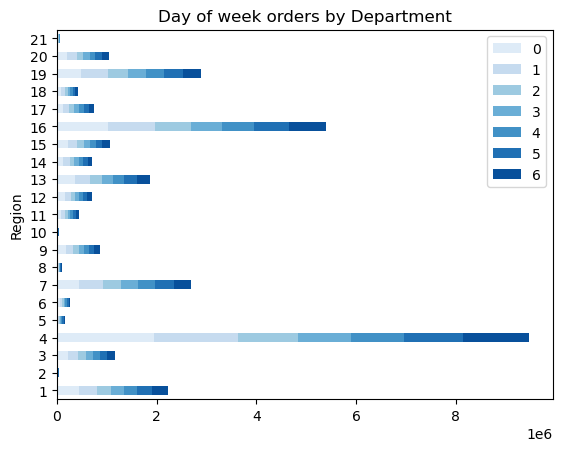

In [78]:
# Create bar chart
dept_dow_bar = dept_day_of_week.plot(kind = 'barh', stacked = True, title = 'Day of week orders by Department',color = sns.color_palette('Blues', 7))
plt.legend(loc='upper right')
plt.ylabel('Region')

In [79]:
# Export bar chart
dept_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders_by_dow_department_bar.png'))

In [80]:
# Check output of final data set
df_all_merged.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,number_of_dependants,family_status,income,region,activity_flag,age_profile,income_profile,family_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,South,High activity,18-40,<=50k,Family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,18-40,<=50k,Family
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,18-40,<=50k,Family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,18-40,<=50k,Family
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,South,High activity,18-40,<=50k,Family


In [81]:
df_all_merged.shape

(32404859, 36)

In [82]:
df_all_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_freq', 'order_freq_flag',
       'gender', 'state', 'age', 'date_joined', 'number_of_dependants',
       'family_status', 'income', 'region', 'activity_flag', 'age_profile',
       'income_profile', 'family_profile'],
      dtype='object')

## 9. Exporting Final data set

In [83]:
# Export new dataframe to pkl
df_all_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'orders_products_customers_final.pkl'))